# Bike Share System Usage
CMSC320 Final Project
By: Jessica Lee, Kelly Li


## Contents
1. Introduction
2. Libraries Used
3. Dataset
4. Importing Data
5. Data Cleaning
6. Data Exploration

## Introduction

Bike share programs are a type of shared public transporatation system that is considered to be eco-friendly and sustainable. Typically these systems work by allowing people to rent bikes at a station, travel to their destination, and return the bike to another station. Such bike programs are frequently implemented in more densly populated areas such as cities, and have been relatively successful. Majority of revenue is from bike users and the the length of time they borrow a bike. This leads to the question: **what factors influences the number of bike trips in bike ahre systems?** Knowing this can allow us to see what business strategies can be used to optimize the conditions in which people use bike share programs and potentially incentivize people to use these more.

In this tutorial, our goal is to create a walkthrough of the data science lifecycle and show how data science tools and techniques can be used to answer this particular question.


## Libraries Used  
In this tutorial, we used the following libraries:
* sqlite3
* pandas
* numpy
* matplotlib
* folium

Please also note we are also using Python [version]

In [1]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium


## Dataset
The dataset used was obtained from Kaggle and is a dataset on a bike share program in San Francisco bay area. It contains 2 years of anonymized bike trip data from August 2013 to August 2015. In total, there are 4 tables: station, status, trip, and weather.

Station has a total of 70 rows and 7 columns. This consists of data that represent stations where users can borrow and return bikes. Status has a total of 71,984,434 rows and 4 columns. This consists of minute by minute data about the number of bikes and docks avaliable at each station. Due to the sheer size of this table, we chose to not include any data contained in this table due to limits in computing power. Trip has a total of 669,959 rows and 11 columns. This consists of individual bike trip data. Weather has a total of 3665 rows and 24 columns. It consists of data about the weather on a particular day for specific zipcodes.

More information on the origin of the dataset can be found here: [SF Bay Area Bike Share Data](https://www.kaggle.com/datasets/benhamner/sf-bay-area-bike-share)

## Importing Data
After obtaining our data from Kaggle, our next step is to import our data into pandas dataframes. Our data from Kaggle includes a zip file that we unzipped locally, which contains a sqlite version of the data and csv version of the data. Below, we decided to import our data sqlite file, however, we can also just read the csv files with `<dataframe> = pd.read_csv(<file path>)` for all csv files.

We first verify that the sqlite file contains all tables. We obtain a list of table names, which reveal the tables to be station, status, trip, and weather as expected

In [2]:
# create connection to sqlite file
con = sqlite3.connect("database.sqlite")

# get tables
sql_query = "SELECT name FROM sqlite_master WHERE type='table';"
cursor = con.cursor()
cursor.execute(sql_query)
print(cursor.fetchall())

[('station',), ('status',), ('trip',), ('weather',)]


To extract an entire table, we use SQL statements to pull all rows from each table, and insert those into a dataframe. Note that for this tutorial we will only be using 3 of the 4 tables for reasons mentioned in the previous section. We can then output the columns as well as a few rows of each dataframe to get a general idea what data is available in each extracted table.

In [23]:
#station = pd.read_sql_query("SELECT * from station", con)
#trip = pd.read_sql_query("SELECT * from trip", con)
#weather = pd.read_sql_query("SELECT * from weather", con)


# if you would like to try out reading from csv files, you can try uncommenting the code segment below!

station = pd.read_csv("station.csv")
trip = pd.read_csv("trip.csv")
weather = pd.read_csv("weather.csv")

station_backup = station.copy(deep=True)
trip_backup = trip.copy(deep=True)
weather_backup = weather.copy(deep=True)

In [4]:
print(station.dtypes)
station.head()

id                     int64
name                  object
lat                  float64
long                 float64
dock_count             int64
city                  object
installation_date     object
dtype: object


,id,name,lat,long,dock_count,city,installation_date
0,2,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,8/6/2013
1,3,San Jose Civic Center,37.330698,-121.888979,15,San Jose,8/5/2013
2,4,Santa Clara at Almaden,37.333988,-121.894902,11,San Jose,8/6/2013
3,5,Adobe on Almaden,37.331415,-121.893200,19,San Jose,8/5/2013
4,6,San Pedro Square,37.336721,-121.894074,15,San Jose,8/7/2013


In [5]:
print(trip.dtypes)
trip.head()

id                     int64
duration               int64
start_date            object
start_station_name    object
start_station_id       int64
end_date              object
end_station_name      object
end_station_id         int64
bike_id                int64
subscription_type     object
zip_code              object
dtype: object


,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
0,4576,63,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127
1,4607,70,8/29/2013 14:42,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138
2,4130,71,8/29/2013 10:16,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,97214
3,4251,77,8/29/2013 11:29,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,Subscriber,95060
4,4299,83,8/29/2013 12:02,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,94103


In [6]:
print(weather.dtypes)
weather.head()

date                               object
max_temperature_f                 float64
mean_temperature_f                float64
min_temperature_f                 float64
max_dew_point_f                   float64
mean_dew_point_f                  float64
min_dew_point_f                   float64
max_humidity                      float64
mean_humidity                     float64
min_humidity                      float64
max_sea_level_pressure_inches     float64
mean_sea_level_pressure_inches    float64
min_sea_level_pressure_inches     float64
max_visibility_miles              float64
mean_visibility_miles             float64
min_visibility_miles              float64
max_wind_Speed_mph                float64
mean_wind_speed_mph               float64
max_gust_speed_mph                float64
precipitation_inches               object
cloud_cover                       float64
events                             object
wind_dir_degrees                  float64
zip_code                          

,date,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,...,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,zip_code
0,8/29/2013,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,57.0,...,10.0,10.0,23.0,11.0,28.0,0,4.0,NaN,286.0,94107
1,8/30/2013,78.0,69.0,60.0,61.0,58.0,56.0,90.0,70.0,50.0,...,10.0,7.0,29.0,13.0,35.0,0,2.0,NaN,291.0,94107
2,8/31/2013,71.0,64.0,57.0,57.0,56.0,54.0,93.0,75.0,57.0,...,10.0,10.0,26.0,15.0,31.0,0,4.0,NaN,284.0,94107
3,9/1/2013,74.0,66.0,58.0,60.0,56.0,53.0,87.0,68.0,49.0,...,10.0,10.0,25.0,13.0,29.0,0,4.0,NaN,284.0,94107
4,9/2/2013,75.0,69.0,62.0,61.0,60.0,58.0,93.0,77.0,61.0,...,10.0,6.0,23.0,12.0,30.0,0,6.0,NaN,277.0,94107


## Data Cleaning

After importing the data, our next step is to clean it. From the above, we see some of the data types for the columns are not ideal and would want to transform them to be something easier to use before performing analysis. However data cleaning is a continuous cycle, thus what we performed in this section is just preliminary data cleaning, and we will continue to perfrom cleaning as we discover more about the data.

We also take this opportunity to create some of our own columns based on existing data to make our analysis later easier. We do this by "binning" which is introducing a new categorical variable that can possibly provide new information. 

In [24]:
# Clean for missing data, remove any rows with missing data
station = station.dropna()
trip = trip.dropna()
weather = weather.drop('events', axis=1)
weather = weather.dropna()

# Convert weather data to numeric values
weather = weather.apply(pd.to_numeric, errors='ignore')

# Convert dates from string to datetime objects
trip['start_date'] = pd.to_datetime(trip['start_date'])
trip['end_date'] = pd.to_datetime(trip['end_date'])
weather['date'] = pd.to_datetime(weather['date'])

# Add a column for start date without time
trip["date"] = pd.to_datetime(trip["start_date"]).dt.date

# Binning by month using the start date
trip['month'] = trip['start_date'].apply(lambda x: x.month)



## Data Exploration

In this part, our goal is to explore our data and get a better understanding of the different variables and some of their relationships

To get a better understanding of the bike program, we can first map out the location of all stations.

In [8]:
# mark all the stations
map_osm = folium.Map(location=[37.60, -122.29], zoom_start=9)

for index, station_info in station.iterrows():
    tooltip_text = station_info['name'] + "\n"
    folium.Marker(location=[station_info["lat"], station_info["long"]], tooltip=tooltip_text).add_to(map_osm)
    
map_osm

From the map output, it appears there are 3 clusters: San Francisco, area in southwest area of the bay, and San Jose. Thus, we can see that the bike share stations are not evenly distributed geographically. We can hover above each marker to obtain the name of the station indicated by the marker.

We can also take a look at the trip data. We first output some summary stats to get a grneral idea.

In [18]:
trip.describe()

,id,duration,start_station_id,end_station_id,bike_id
count,669959.000000,6.699590e+05,669959.000000,669959.000000,669959.000000
mean,460382.009899,1.107950e+03,57.851876,57.837438,427.587620
std,264584.458487,2.225544e+04,17.112474,17.200142,153.450988
min,4069.000000,6.000000e+01,2.000000,2.000000,9.000000
25%,231082.500000,3.440000e+02,50.000000,50.000000,334.000000
50%,459274.000000,5.170000e+02,62.000000,62.000000,440.000000
75%,692601.000000,7.550000e+02,70.000000,70.000000,546.000000
max,913460.000000,1.727040e+07,84.000000,84.000000,878.000000


In this case, the summary statatistics for ID related columns do not mean much. However, duration appears to be interesting where the mean is approximately 1108. This leads to the question what are the units? It does not appear to be in minutes or units of anything larger. Thus we can temporarily assume it is seconds and attempt to convert into minutes, and see if it gives reasonable results.

In [25]:
trip['duration'] = trip['duration'].apply(lambda x: x / 60)
trip.describe()

,id,duration,start_station_id,end_station_id,bike_id,month
count,663340.000000,663340.000000,663340.000000,663340.000000,663340.000000,663340.000000
mean,463849.196803,17.953531,57.856609,57.841721,427.475040,6.459206
std,263236.718344,372.233985,17.124582,17.212950,153.612018,3.269637
min,4069.000000,1.000000,2.000000,2.000000,9.000000,1.000000
25%,237254.750000,5.716667,50.000000,50.000000,334.000000,4.000000
50%,463612.500000,8.566667,62.000000,62.000000,440.000000,7.000000
75%,694728.250000,12.483333,70.000000,70.000000,546.000000,9.000000
max,913460.000000,287840.000000,84.000000,84.000000,878.000000,12.000000


From the new mean of the duration, it appears our guess was correct that the original units was in seconds since it appears reasonable the duration of a bike trip can be around 17 minutes. The max being 287,840 minutes imply there is at least one outlier. With 75% of our bike trip duration data to be around 12.5 minutes or less, yet our mean is greater than 12.5 means our data is very skewed. Thus we can attempt to plot the distribution of the biking times to be at most 1 hours to better understand duration trends without the interference of outliers.

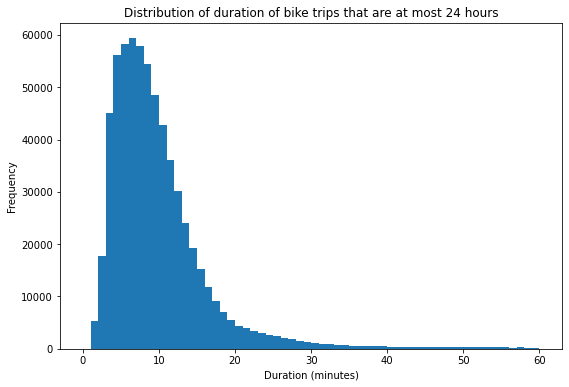

In [38]:
# histogram of the biking time duration for trips of length 1 hour
# Label points and change plot size
fig, ax = plt.subplots(figsize = (9, 6))
plt.hist(trip['duration'], bins = 60, range=[0, 1 * 60])

# Graph labels and titles
plt.title('Distribution of duration of bike trips that are at most 1 hour')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()

As expected, our histogram does reveal that our data is skewed, and has a relatively long right tail. 

The next thing we consider is the frequency of the bike trips. Is the number of bike trips a seasonal pattern?
To do this, we can use the bins we created by month to construct another visualization that allows us to compare the number of bike trips per month.

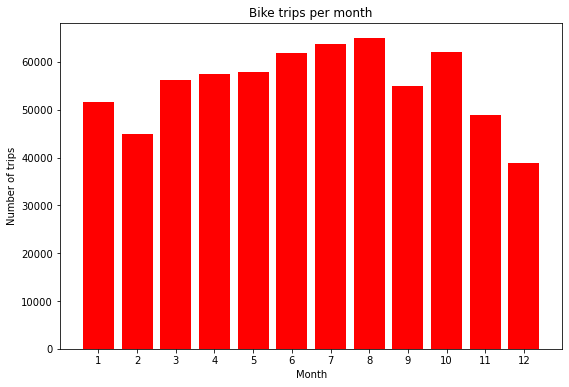

In [44]:
# number of bike trips per month
# Label points and change plot size
fig, ax = plt.subplots(figsize = (9, 6))
plt.bar(range(1, 13), np.bincount(trip['month'], minlength=13)[1:], color='red')

# Graph labels and titles
plt.title('Bike trips per month')
plt.xlabel('Month')
plt.ylabel('Number of trips')
ax.set_xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
plt.show()


We observe that December seems to be the month with the least bike trips and August is the month that has the most bike trips out of all other months. There seems to be a general trend where spring and summer months have more bike trips than the fall and winter months.

Thus does months also have any relationship with bike trip duration? We can visualize this with a series of box plots to see if there is.

Note for the boxplot graphed, the whiskers by default "extend no more than 1.5 * IQR (IQR = Q3 - Q1) from the edges of the box, ending at the farthest data point within that interval" according to doucmentation on the boxplot function found [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html).

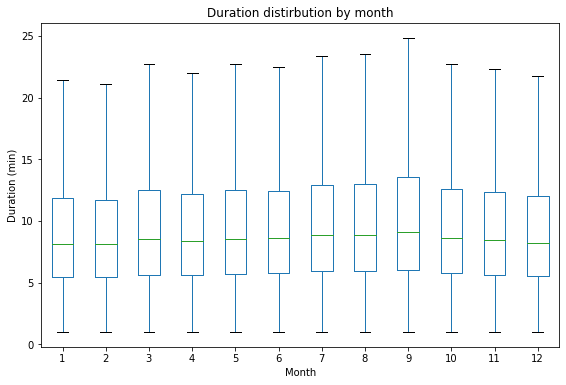

In [42]:
# Show distribution of bike duration per month via box plots

ax = trip[['month', 'duration']].boxplot(by='month', grid=False, showfliers=False, figsize=(9, 6), return_type='axes')
plt.title("Duration distirbution by month")
plt.suptitle('')
plt.xlabel('Month')
plt.ylabel('Duration (min)')
plt.show()

In [12]:
weather.head()

#line graph of 3 temps by date

#line graph of dew points by date

,date,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,...,max_visibility_miles,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,wind_dir_degrees,zip_code
0,2013-08-29,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,57.0,...,10.0,10.0,10.0,23.0,11.0,28.0,0,4.0,286.0,94107
1,2013-08-30,78.0,69.0,60.0,61.0,58.0,56.0,90.0,70.0,50.0,...,10.0,10.0,7.0,29.0,13.0,35.0,0,2.0,291.0,94107
2,2013-08-31,71.0,64.0,57.0,57.0,56.0,54.0,93.0,75.0,57.0,...,10.0,10.0,10.0,26.0,15.0,31.0,0,4.0,284.0,94107
3,2013-09-01,74.0,66.0,58.0,60.0,56.0,53.0,87.0,68.0,49.0,...,10.0,10.0,10.0,25.0,13.0,29.0,0,4.0,284.0,94107
4,2013-09-02,75.0,69.0,62.0,61.0,60.0,58.0,93.0,77.0,61.0,...,10.0,10.0,6.0,23.0,12.0,30.0,0,6.0,277.0,94107


In [40]:
#avg biking duration per day (start)
duration_by_date = trip.groupby(["date"]).mean()
duration_by_date


,id,duration,start_station_id,end_station_id,bike_id,month
date,,,,,,
2013-08-29,4659.222380,24.958215,54.046742,54.505666,430.427762,8.0
2013-08-30,5838.034215,43.656091,53.925350,53.802488,433.839813,8.0
2013-08-31,6961.987654,58.098266,55.820106,55.895944,422.428571,8.0
2013-09-01,7964.936609,49.855203,53.174326,52.836767,435.106181,9.0
2013-09-02,8948.629758,34.233160,54.688581,54.730104,426.160900,9.0
...,...,...,...,...,...,...
2015-08-27,908183.999307,13.519831,58.695773,58.938323,432.569647,8.0
2015-08-28,909907.522951,12.682732,59.205738,58.739344,426.429508,8.0
2015-08-29,910939.764012,38.457620,57.687316,57.598820,431.035398,8.0


## Data Analysis and Hypothesis Testing

## Predicting [something] with Machine Learning

In [14]:
# regression with weather and number of bike rides

## Conclusion